In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def pert(low, p, up): #the PERT distribution function (to be used for random choise of parameters in MCMC)
    # low: lower bound
    #p: peak
    #up: upper bound
    
    lamb=4
    r = up - low
    alpha = 1 + lamb * (p-low) / r
    beta = 1 + lamb * (up - p) / r
    d = np.random.beta(alpha, beta, size=1)
    d = d * r
    return low + d

def pert_array(low, p, up):
    #p is an array of peak values for pert distribution
    #low: array of lower-bound values for pert distribution
    #up: array of upper-bound values for pert distribution
    # b is an array of pert outputs
    
    b = np.empty((len(p)))
    for i in range(len(p)):
        b[i]= pert(low[i], p[i], up[i])                 
    return b

In [3]:
#these two bounds should be changed with regard to the reasonable bound for the fitting parameter
param_length = 5
low = np.zeros((param_length))
up = np.ones((param_length))
chain = np.zeros((param_length))
for i in range(len(chain)):
    chain[i]=0.5

In [4]:
low

array([0., 0., 0., 0., 0.])

In [5]:
new_param = pert_array(low, chain, up)

In [7]:
new_param

array([0.64158905, 0.50068325, 0.56309948, 0.89203969, 0.51993618])

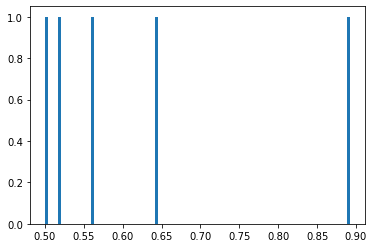

In [6]:
plt.hist(new_param, bins=100)
plt.show()

In [1]:
def dict_to_list(d): # converts dictionary to two lists
    #d must be a dictionary containing the value of parameters and their names
    key = list(d.keys())
    value = list(d.values())
    return value, key

def list_to_dict(value, key): #converts two lists to a dictionary
    #value is a list of parameters' values
    #key is a list parameters' names
    return dict(zip(key, value))

In [2]:
#MCMC inputs (the guess subscipt is related to the original guess)------------------------------------------------------------------
start_guess = {'fstar': 0.1, 'fX': 0.2, 'fesc':0.1}
param_length = len(start_guess)
                 
#converting start guess to two lists
value_guess, key_guess = dict_to_list(start_guess)

In [4]:
key_guess[0]

'fstar'